In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/wine_data.csv',header=None, usecols=[0,1,2])
df.columns = ['Class label', 'Alcohol', 'Malic acid']

In [ ]:
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

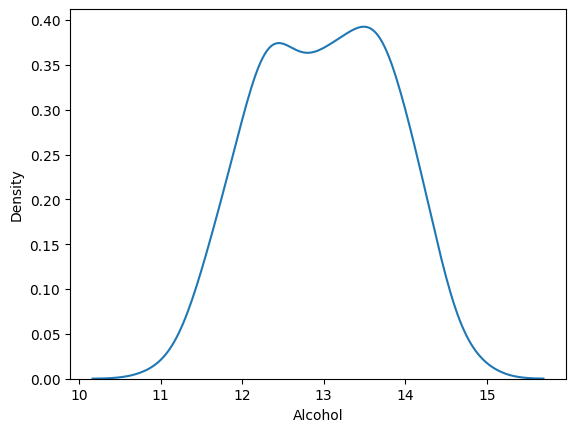

In [ ]:
sns.kdeplot(df['Alcohol']) #distribution plot, pdf

<Axes: xlabel='Malic acid', ylabel='Density'>

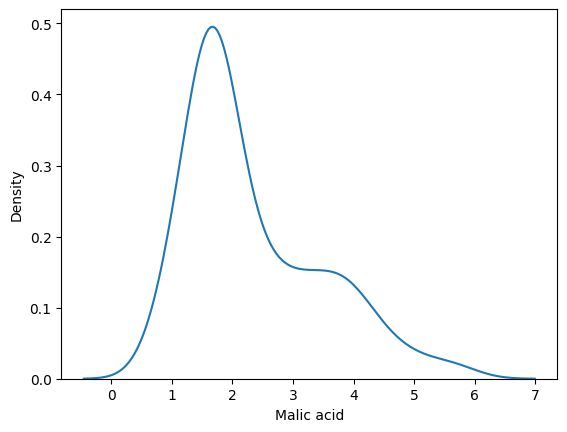

In [ ]:
sns.kdeplot(df['Malic acid'])

In [ ]:
df['Class label'].unique()

array([1, 2, 3])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

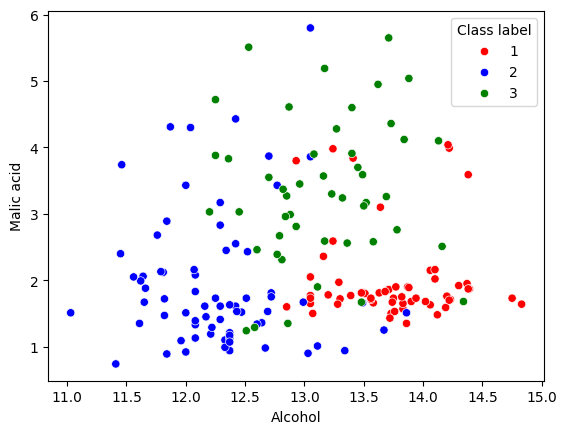

In [ ]:
color_dict = {1:'red', 2:'blue', 3:'green'}
sns.scatterplot(x='Alcohol', y='Malic acid', data=df, hue='Class label', palette=color_dict) #scatter plot

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['Alcohol', 'Malic acid']]
y = df['Class label']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [ ]:
np.round(x_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.3
std,0.8,1.1
min,11.0,0.7
25%,12.4,1.5
50%,13.0,1.8
75%,13.7,2.9
max,14.8,5.8


In [ ]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.4
max,1.0,1.0


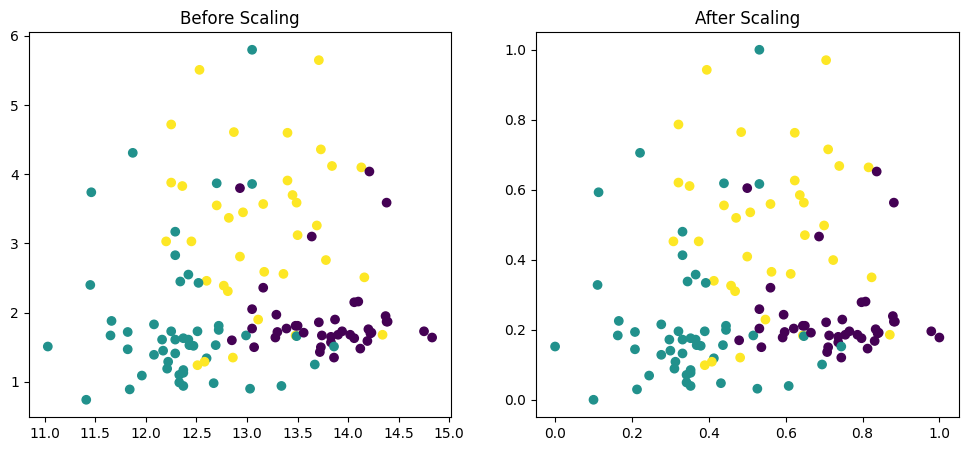

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Alcohol'], x_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Alcohol'], x_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

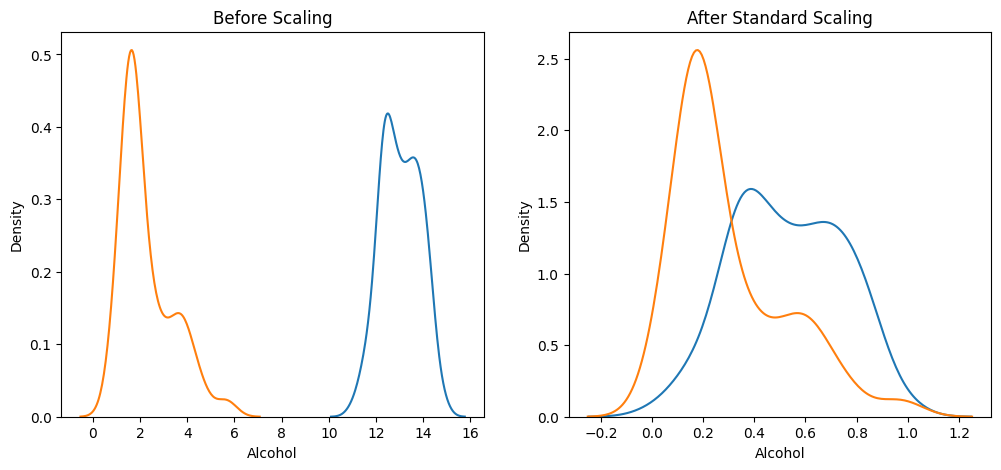

In [ ]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Alcohol'], ax=ax1)
sns.kdeplot(x_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['Malic acid'], ax=ax2)
plt.show() #

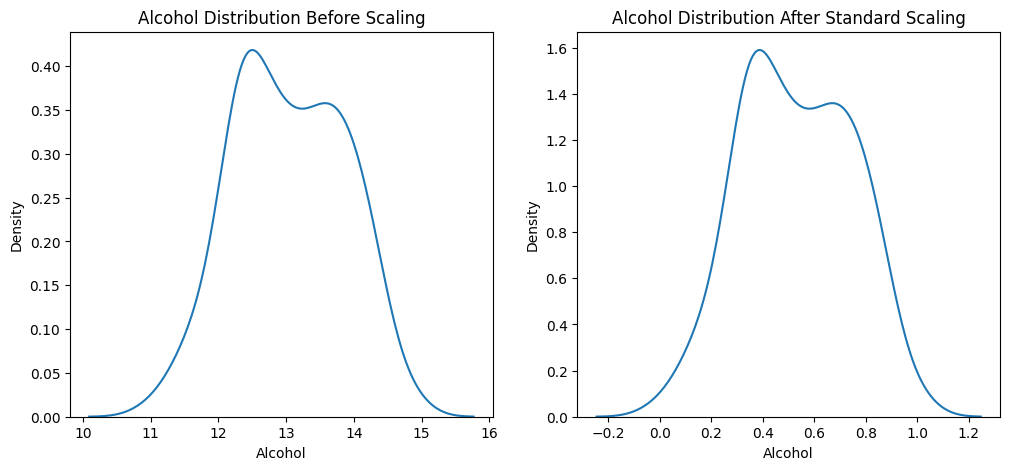

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(x_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)
plt.show()